
# Project:  Housing Prices



In [ ]:
# These libraries are pre-installed in SN Labs. If running in another environment please uncomment lines below to install them:
!pip install --force-reinstall ibm_db==3.1.0 ibm_db_sa==0.3.3
# Ensure we don't load_ext with sqlalchemy>=1.4 (incompadible)
!pip uninstall sqlalchemy==1.4 -y && pip install sqlalchemy==1.3.24
!pip install ipython-sql

In [2]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd


# Load the Boston housing dataset
house_p = pd.read_csv('housing.csv')

    
# Success
print("Boston housing dataset has",house_p.shape[0],"data points with",house_p.shape[1],"variables each.")
house_p.head()

Boston housing dataset has 489 data points with 4 variables each.


,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0
2,7.185,4.03,17.8,728700.0
3,6.998,2.94,18.7,701400.0
4,7.147,5.33,18.7,760200.0


### Question 1 - Feature Observation
As a reminder, we are using three features from the Boston housing dataset: `'RM'`, `'LSTAT'`, and `'PTRATIO'`. For each data point (neighborhood):
- `'RM'` is the average number of rooms among homes in the neighborhood.
- `'LSTAT'` is the percentage of homeowners in the neighborhood considered "lower class" (working poor).
- `'PTRATIO'` is the ratio of students to teachers in primary and secondary schools in the neighborhood.


** Using your intuition, for each of the three features above, do you think that an increase in the value of that feature would lead to an **increase** in the value of `'MEDV'` or a **decrease** in the value of `'MEDV'`? Justify your answer for each.**

**Hint:** This problem can phrased using examples like below.  
* Would you expect a home that has an `'RM'` value(number of rooms) of 6 be worth more or less than a home that has an `'RM'` value of 7?
* Would you expect a neighborhood that has an `'LSTAT'` value(percent of lower class workers) of 15 have home prices be worth more or less than a neighborhood that has an `'LSTAT'` value of 20?
* Would you expect a neighborhood that has an `'PTRATIO'` value(ratio of students to teachers) of 10 have home prices be worth more or less than a neighborhood that has an `'PTRATIO'` value of 15?

In [3]:
%load_ext sql

In [4]:
import sqlite3

con = sqlite3.connect("housing.db")#build a data base file on the same device 

In [5]:
%sql sqlite:///housing.db

# Transforming a df to a db

In [6]:
house_p.to_sql("house_p", con, if_exists='replace', index=False)#  اختراع convert rom data fram to sql table

489

In [7]:
%sql SELECT * FROM house_p;

 * sqlite:///housing.db
Done.


RM,LSTAT,PTRATIO,MEDV
6.575,4.98,15.3,504000.0
6.421,9.14,17.8,453600.0
7.185,4.03,17.8,728700.0
6.998,2.94,18.7,701400.0
7.147,5.33,18.7,760200.0
6.43,5.21,18.7,602700.0
6.012,12.43,15.2,480900.0
6.172,19.15,15.2,569100.0
5.631,29.93,15.2,346500.0
6.004,17.1,15.2,396900.0


In [22]:
%sql SELECT MAX(MEDV) FROM house_p;

 * sqlite:///housing.db
Done.


MAX(MEDV)
1024800.0


# Task 1:
* use sql ,pandas ,matplot,seaborn to find a relation between house prices and the rset of features
* find a relation between house price and nmber of rooms
* find relation between services(like number of schools) and house price
* find a relation between house price and neighborhood considered "lower class" (working poor).

 * sqlite:///housing.db
Done.
<class 'pandas.core.frame.DataFrame'>


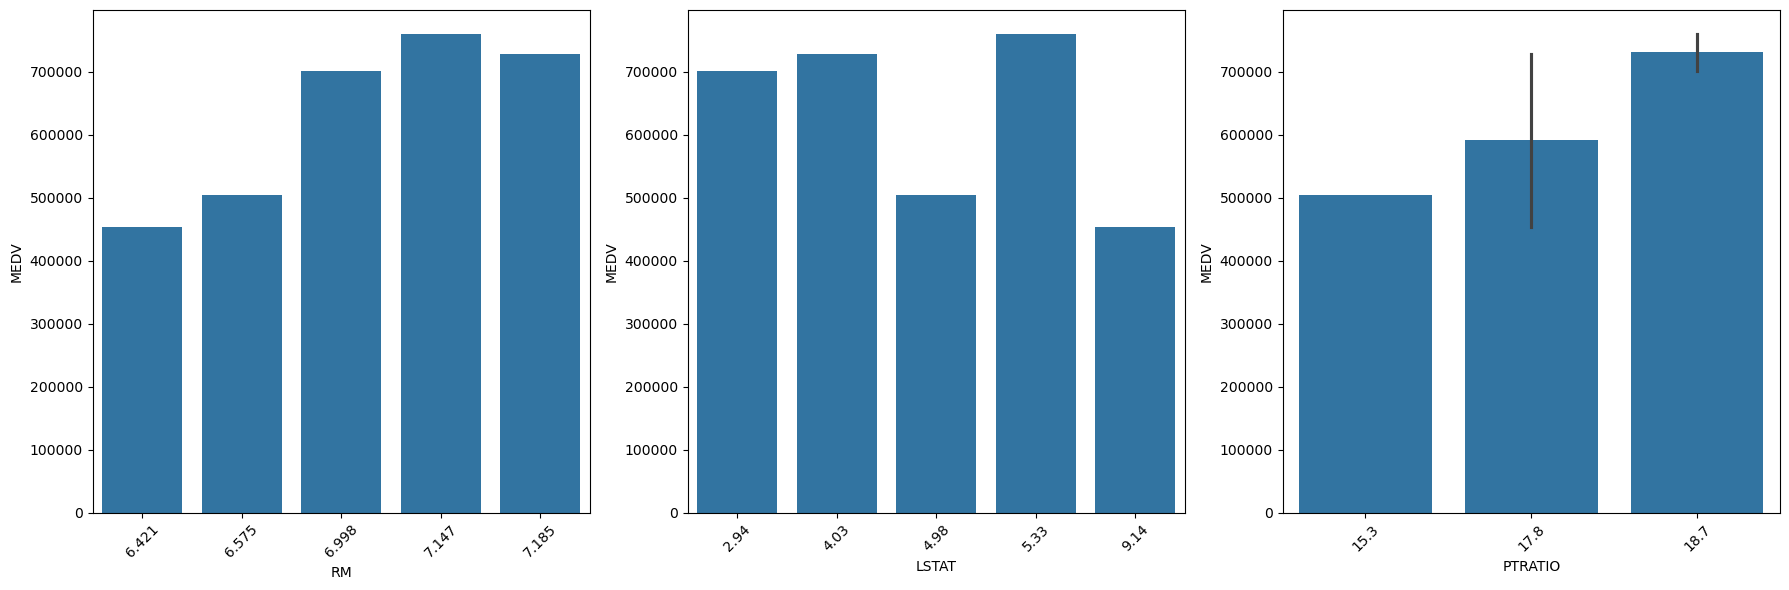

In [24]:
#use many scatterplots to find these relations
house_p_dist = %sql SELECT * FROM house_p;
import matplotlib.pyplot as plt
import seaborn as sb
dataframe = house_p_dist.DataFrame()
print(type(dataframe))
dataframe = dataframe.head(5)

%matplotlib inline
import seaborn as sb
import matplotlib.pyplot as plt

# Assuming dataframe is your DataFrame
plt.figure(figsize=(18, 6))

# First barplot
plt.subplot(1, 3, 1)
sb.barplot(x='RM', y='MEDV', data=dataframe)
plt.xticks(rotation=45)

# Second barplot
plt.subplot(1, 3, 2)
sb.barplot(x='LSTAT', y='MEDV', data=dataframe)
plt.xticks(rotation=45)

# Third barplot
plt.subplot(1, 3, 3)
sb.barplot(x='PTRATIO', y='MEDV', data=dataframe)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


# Task 2 :
## what is your suggestion to imporve the value of low class areas in 10 years ?